# __Incremental Capstone - Week 6__ 

Just a loop. Summary of [ex07_week_6](ex07_week_6.ipynb)

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
import tabulate

In [2]:
# Get the dataset
dataset = pd.read_csv('./data/adultcensusincome.csv')
dataset = dataset.replace('?', np.nan)
columns_with_nan = ['workclass', 'occupation', 'native.country']
for col in columns_with_nan:
    dataset[col] = dataset[col].fillna(dataset[col].mode()[0])

In [3]:
# Encode the categorical variables
for col in dataset.columns:
    if dataset[col].dtypes == 'object':
        encoder = LabelEncoder()
        dataset[col] = encoder.fit_transform(dataset[col])

In [4]:
# Prepare independent variables X and dependent variable Y (Income).
X = dataset.drop('income', axis=1)
Y = dataset['income']
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(- 1, 1))
ros = RandomOverSampler(random_state=42)
X_resampled, Y_resampled = ros.fit_resample(X, Y)

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=42)

In [6]:
models = [
    ("lr", LogisticRegression(solver='liblinear')),
    ("knn", KNeighborsClassifier(n_neighbors=5)),
    ("nb", GaussianNB()),
    ("dt", DecisionTreeClassifier(max_depth=7)),
    ("rf", RandomForestClassifier(n_estimators=120, max_depth=7)),
    ("svc", SVC(kernel="rbf", C=2))
]

In [7]:
# fit all models
for model_name, model in models:
    model.fit(X_train, Y_train)


In [8]:
# Do predictions, save results
results = []
for model_name, model in models:
    yhat = model.predict(X_test)
    accuracy = metrics.accuracy_score(Y_test, yhat)
    precision = metrics.precision_score(Y_test, yhat)
    recall = metrics.recall_score(Y_test, yhat)
    cm = metrics.confusion_matrix(Y_test, yhat)
    f1 = metrics.f1_score(Y_test, yhat)
    results.append([model_name, accuracy, precision, recall, f1,cm])

In [9]:
def plot_confusion_matrix(ax, cm, model_name):
    # Plot the confusion matrix on a subplot
    heatmap = sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap="Blues",
                          annot_kws={"size": 8})
    cbar = heatmap.collections[0].colorbar
    cbar.ax.tick_params(labelsize=8)
    ax.set_xlabel('Predicted labels', fontsize=8)
    ax.set_ylabel('True labels', fontsize=8)
    ax.set_title(model_name, fontsize=12)
    ax.xaxis.set_ticklabels(['YES', 'NO'], fontsize=8)
    ax.yaxis.set_ticklabels(['YES', 'NO'], fontsize=8)

In [10]:
headers = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Confusion Matrix']
print(tabulate.tabulate(results, headers=headers, tablefmt='grid'))

+---------+------------+-------------+----------+------------+--------------------+
| Model   |   Accuracy |   Precision |   Recall |   F1 Score | Confusion Matrix   |
+=========+============+=============+==========+============+====================+
| lr      |   0.76699  |    0.767338 | 0.764849 |   0.766091 | [[3811 1144]       |
|         |            |             |          |            |  [1160 3773]]      |
+---------+------------+-------------+----------+------------+--------------------+
| knn     |   0.835862 |    0.79617  | 0.901885 |   0.845737 | [[3816 1139]       |
|         |            |             |          |            |  [ 484 4449]]      |
+---------+------------+-------------+----------+------------+--------------------+
| nb      |   0.689422 |    0.863956 | 0.448003 |   0.590041 | [[4607  348]       |
|         |            |             |          |            |  [2723 2210]]      |
+---------+------------+-------------+----------+------------+--------------

<Figure size 1200x1200 with 0 Axes>

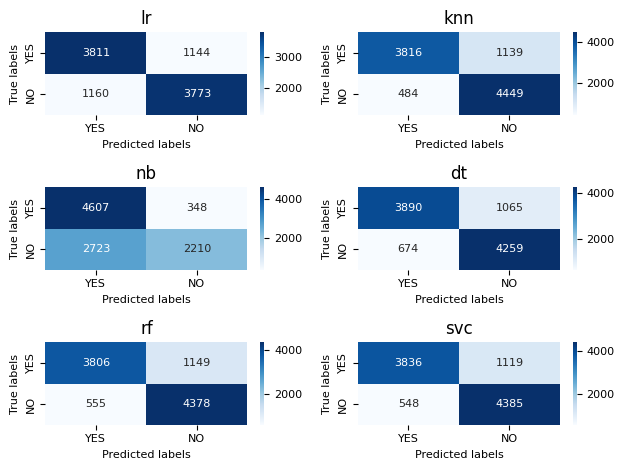

In [11]:
plt.figure(figsize=(12, 12))
_, ax = plt.subplots(3, 2)
# Plot confusion matrix for each model
for i, result in enumerate(results):
    plot_confusion_matrix(ax[i//2][i%2], result[5], result[0])
plt.tight_layout()
plt.show()
